# What is picbad
Picbad is a module that can be used to compute the interaction of polymer brushes with walls and particles. The general use follows the process described below.

## Install picbad
Before you can use the module, first you need to install it. To do this:
1. Open a terminal window in the root directory
2. Run `pip install -e .`

Alternatively, you can also run the cell below.

In [1]:
!pip install -e .

Obtaining file:///D:/Theory/picbad/picbad
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: picbad
    Found existing installation: picbad 0.0.1
    Uninstalling picbad-0.0.1:
      Successfully uninstalled picbad-0.0.1
  Running setup.py develop for picbad



[notice] A new release of pip available: 22.2.1 -> 25.1.1
[notice] To update, run: C:\Users\SmookLA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# The following two lines enable you to edit the script without a need to reload the notebook
%load_ext autoreload
%autoreload 2

# Let's load the module
import brush as b

# And get some additional things ready to visualize the results later
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Define your brush
Define the properties of the brush you want to study. You can choose one of the predefined chain length probability distributions distributions, or implement your own chain length probability distribution in the code. Currently, the following distributions are implemented:

#### Gaussian
This distribution gives a simple Gaussian chain length probability distribution. The distribution requires two input paramters that define the distribution:
-  `Mn` - Number average length of the grafted chains
-  `sigma` - The standard deviation around this average length

#### Schulz-Zimm
This distribution models reversible-deactivation radical polymerization reactions
- `Mn` - Number average length of the grafted chains
- `D` - The dispersity of the grafted chains (Mw/Mn)

Besides these distributions, you can also tune various other properties of the brush, including
- `grafting_density` - Grafting density in reduced units (Default 0.1)
- `nu` - Flory exponent for solvent quality (Default 0.588)
- `kT` - Thermal energy in reduced units (Default 1.0)
- `monomer_size` - Size of the monomer segments and de facto system length scale (Default 1.0)
- `osmotic_prefactor` - Scaling factor for the osmotic pressure (cf Equation 15 in the publication) (Default 1.0)
- `volume_scaling` - Scaling to map theory onto simulations (Default 1.0)

Let's create a Gaussian brush and a Schulz-Zimm brush as an example.

In [8]:
brush_gaussian = b.Brush("model", 
                         {"type" : "gaussian",  
                          "Mn" : 100,
                          "sigma" : 10.0},
                          grafting_density = 0.1)
brush_sz = b.Brush("model",
                   {"type" : "schulz-zimm",
                    "Mn" : 100,
                    "D" : 1.3},
                    grafting_density = 0.1)

Now that we have these brushes, let's visualize their profiles.

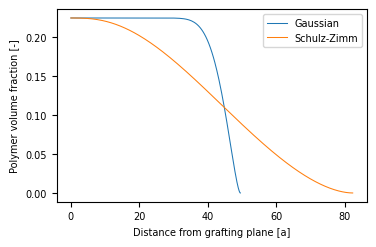

In [11]:
fig, ax = plt.subplots(figsize=(4,2.5))
ax.plot(brush_gaussian.z, brush_gaussian.phi_N, "-", label='Gaussian', color='tab:blue')
ax.plot(brush_sz.z, brush_sz.phi_N, '-', label='Schulz-Zimm', color='tab:orange')
ax.set_xlabel('Distance from grafting plane [a]')
ax.set_ylabel('Polymer volume fraction [-]')
ax.legend()

Now let's compress these profiles and see what force they exert on the wall.

In [21]:
brush_gaussian.compress_profile(beta=0, # No interaction between the wall and the polymer, adjust to include (cf. Eq 16 in publication)
                             surface_area=100, # Surface area of the brush (in reduced units)
                             redistribute_polymer=True # Apply redistribution as describe in publication
                             )
brush_sz.compress_profile(beta=0, # No interaction between the wall and the polymer, adjust to include (cf. Eq 16 in publication)
                             surface_area=100, # Surface area of the brush (in reduced units)
                             redistribute_polymer=True # Apply redistribution as describe in publication
                             )

This method as added a compression-force profile to the brush object. Let's have a look.

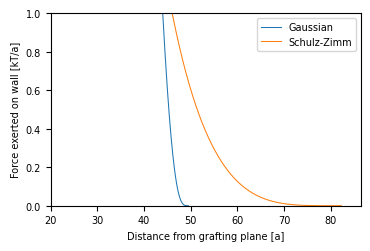

In [22]:
fig, ax = plt.subplots(figsize=(4,2.5))
ax.plot(brush_gaussian.z, brush_gaussian.compression_force, "-", label='Gaussian', color='tab:blue')
ax.plot(brush_sz.z, brush_sz.compression_force, '-', label='Schulz-Zimm', color='tab:orange')
ax.set_xlabel('Distance from grafting plane [a]')
ax.set_ylabel('Force exerted on wall [kT/a]')
ax.set_xlim(left=20)
ax.set_ylim(bottom=0,top=1)
ax.legend()

We can also check the forces on a particle.

In [23]:
brush_gaussian.insert_particle(beta=0.0,
                               radius=5)
brush_sz.insert_particle(beta=0.0,
                        radius=5)

Let's have a look at the force on this particle as well

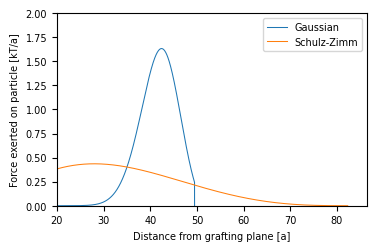

In [25]:
fig, ax = plt.subplots(figsize=(4,2.5))
ax.plot(brush_gaussian.z, brush_gaussian.insertion_force, "-", label='Gaussian', color='tab:blue')
ax.plot(brush_sz.z, brush_sz.insertion_force, '-', label='Schulz-Zimm', color='tab:orange')
ax.set_xlabel('Distance from grafting plane [a]')
ax.set_ylabel('Force exerted on particle [kT/a]')
ax.set_xlim(left=20)
ax.set_ylim(bottom=0,top=2)
ax.legend()

## How to add your own distributions
You can add your own custom distributions by adjusting the `brush.py` file by following these steps. This will only work after cloning the repository locally.

1. Identify the `generate_profile` function
2. Add an `elif params["type"] == <your distribution>:`-statement before the `else`-statement.
3. If needed, extract the parameters passed along in the dictionary
4. Create a `pdf` lambda-function that describes your distribution. NOTE: the function must be called `pdf` for the rest of the script to work
5. Save the file and reload the notebook/ script if needed

You can now study brushes with your own distribution.